In [1]:
import sqlalchemy as db
import numpy as np
import pandas as pd
import pyodbc
import yaml
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# custom functions imports
import MS_Functions

In [3]:
db_config_file_path = '../db_config.yml'
db_config = yaml.safe_load(open(db_config_file_path))

In [4]:
engine = db.create_engine('{DB_DRIVER}://{DB_USERNAME}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}?driver={DB_ODBC_DRIVER}'.format(**db_config))

In [5]:
sql = """
SELECT 
ps.[PRIMARY] , 
ps.ID ,
ps.INSDATE,
ps.MA_NR ,
ps.WSG_ID ,
ps.WZS_ID ,
ps.WZD_ID ,
ps.KOR_ID ,
ps.ST_ID ,
ps.AT_ID ,
ps.PUS_ID ,
IMAX_R,
IMAX_L,
IRMS_R,
IRMS_L,
IINT_R,
IINT_L,
IMAX_R_abHUB2,
IRMS_R_abHUB2,
IINT_R_abHUB2,
POSI_X,
POSI_Y,
POSI_Y_L,
POSI_Z,
ORD1_R,
ORD2_R,
ORDz1_I_R,
ORDz2_I_R,
ORDz3_I_R,
ORDsum_R,
ORD1_L,
ORD2_L,
ORDz1_I_L,
ORDz2_I_L,
ORDz3_I_L,
ORDsum_L,
ORDb_aR,
ORDz1_aR,
ORDz2_aR,
ORDz3_aR,
ORDsum_aR,
ORDAmax_aR,
ORDFmax_aR,
ORDb_aL,
ORDz1_aL,
ORDz2_aL,
ORDz3_aL,
ORDsum_aL,
ORDAmax_aL,
ORDFmax_aL,
AXIS_C_ACTIVE,
FORCE_FAKTOR,
APM_SCHL_Aktiv,
SCHLEIFZEIT,
IRMS_V,
IMAX_Xanfahrt,
IINT_V,
VORSTUFE_AKTIV,
IMAX_V,
IINTOFF_R,
NIO,
CASE WHEN NIO=0 THEN 0 ELSE 1 END NIO_GROUP
FROM dbo.prozessmessung_schleifen ps 
WHERE MA_NR IN (78635, 99996, 78494, 78459, 78583, 99997)
AND WARM = 0
AND TEACH_ACTIVE = 0
AND READY = 1;
"""

In [6]:
with engine.connect() as conn:
    df = pd.read_sql(sql=sql, con=conn)

In [7]:
df.shape

(1376418, 62)

In [8]:
df.head()

,PRIMARY,ID,INSDATE,MA_NR,WSG_ID,WZS_ID,WZD_ID,KOR_ID,ST_ID,AT_ID,...,APM_SCHL_Aktiv,SCHLEIFZEIT,IRMS_V,IMAX_Xanfahrt,IINT_V,VORSTUFE_AKTIV,IMAX_V,IINTOFF_R,NIO,NIO_GROUP
0,2276141,89425,2020-02-12 12:57:59,78459,1,625,1,72,1,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,2276142,89426,2020-02-12 12:58:19,78459,1,625,1,72,1,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,2276143,89427,2020-02-12 12:58:41,78459,1,625,1,72,1,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,2276144,89428,2020-02-12 12:59:04,78459,1,625,1,72,1,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,2276145,89429,2020-02-12 12:59:22,78459,1,625,1,72,1,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [24]:
(df
 .groupby('MA_NR')[['WSG_ID', 'WZS_ID', 'WZD_ID', 'KOR_ID', 'ST_ID', 'AT_ID', 'PUS_ID']]
 .agg('nunique')
)

,WSG_ID,WZS_ID,WZD_ID,KOR_ID,ST_ID,AT_ID,PUS_ID
MA_NR,,,,,,,
78459,1,1197,1,117,2,1,14
78494,2,2121,2,399,2,2,50
78583,2,1726,3,244,9,5,94
78635,16,4925,21,1234,239,42,283
99996,16,3592,19,1001,234,42,281
99997,2,1720,3,244,9,5,94


In [10]:
plot_columns = [
    'IMAX_R',
    'IMAX_L',
    'IRMS_R',
    'IRMS_L',
    'IINT_R',
    'IINT_L',
    'IMAX_R_abHUB2',
    'IRMS_R_abHUB2',
    'IINT_R_abHUB2',
    'POSI_X',
    'POSI_Y',
    'POSI_Y_L',
    'POSI_Z',
    'ORD1_R',
    'ORD2_R',
    'ORDz1_I_R',
    'ORDz2_I_R',
    'ORDz3_I_R',
    'ORDsum_R',
    'ORD1_L',
    'ORD2_L',
    'ORDz1_I_L',
    'ORDz2_I_L',
    'ORDz3_I_L',
    'ORDsum_L',
    'ORDb_aR',
    'ORDz1_aR',
    'ORDz2_aR',
    'ORDz3_aR',
    'ORDsum_aR',
    'ORDAmax_aR',
    'ORDFmax_aR',
    'ORDb_aL',
    'ORDz1_aL',
    'ORDz2_aL',
    'ORDz3_aL',
    'ORDsum_aL',
    'ORDAmax_aL',
    'ORDFmax_aL',
    'AXIS_C_ACTIVE',
    'FORCE_FAKTOR',
    'APM_SCHL_Aktiv',
    'SCHLEIFZEIT',
    'IRMS_V',
    'IMAX_Xanfahrt',
    'IINT_V',
    'VORSTUFE_AKTIV',
    'IMAX_V',
    'NIO_GROUP'
    ]

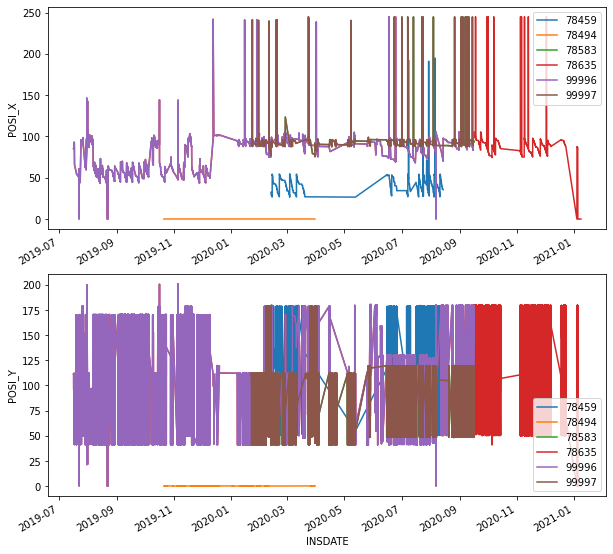

In [22]:
plot_time_series(df, plot_columns, index_is_timestamp=True, groupby=['MA_NR'])

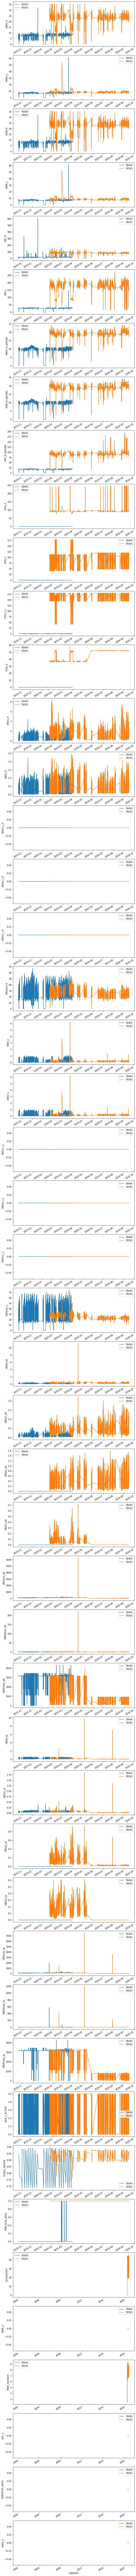

In [106]:
plot_time_series(df, plot_columns, index_is_timestamp=True, groupby=['MA_NR'], ma_nr=[78494, 78583])

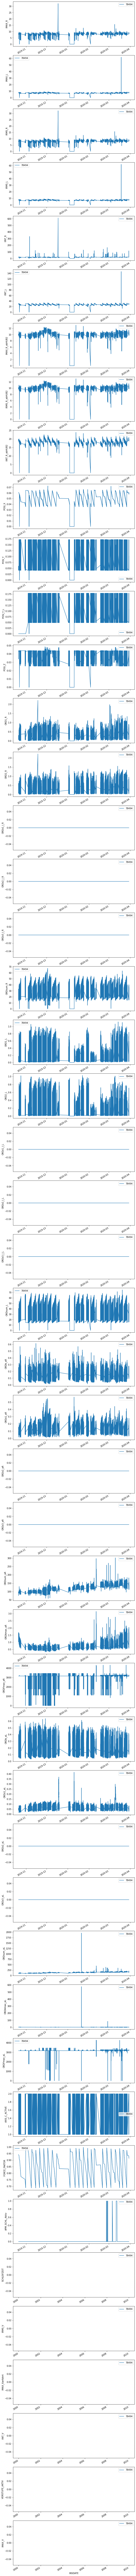

In [107]:
plot_time_series(df, plot_columns, index_is_timestamp=True, groupby=['MA_NR'], ma_nr=[78494])

In [108]:
### select machine 78494 for initial data exploration because of good amount of data and few different input params

In [29]:
df_m = df.loc[df['MA_NR']==78494]
df_m.shape

(248890, 61)

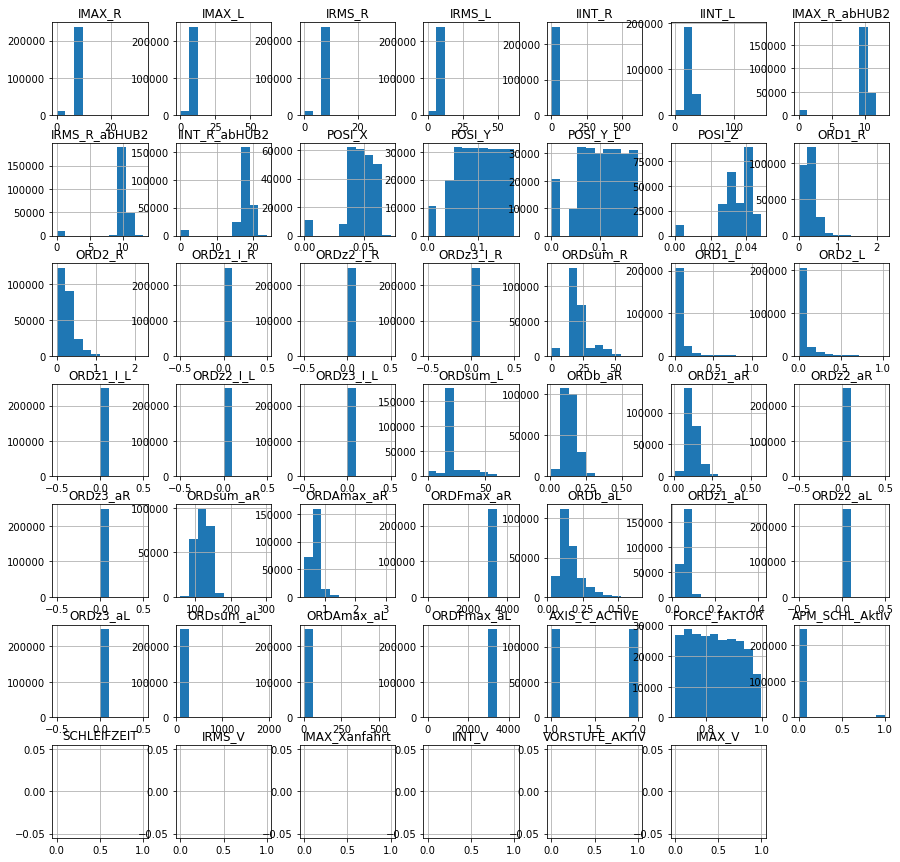

In [110]:
df_m[plot_columns].hist(figsize=(15,15));

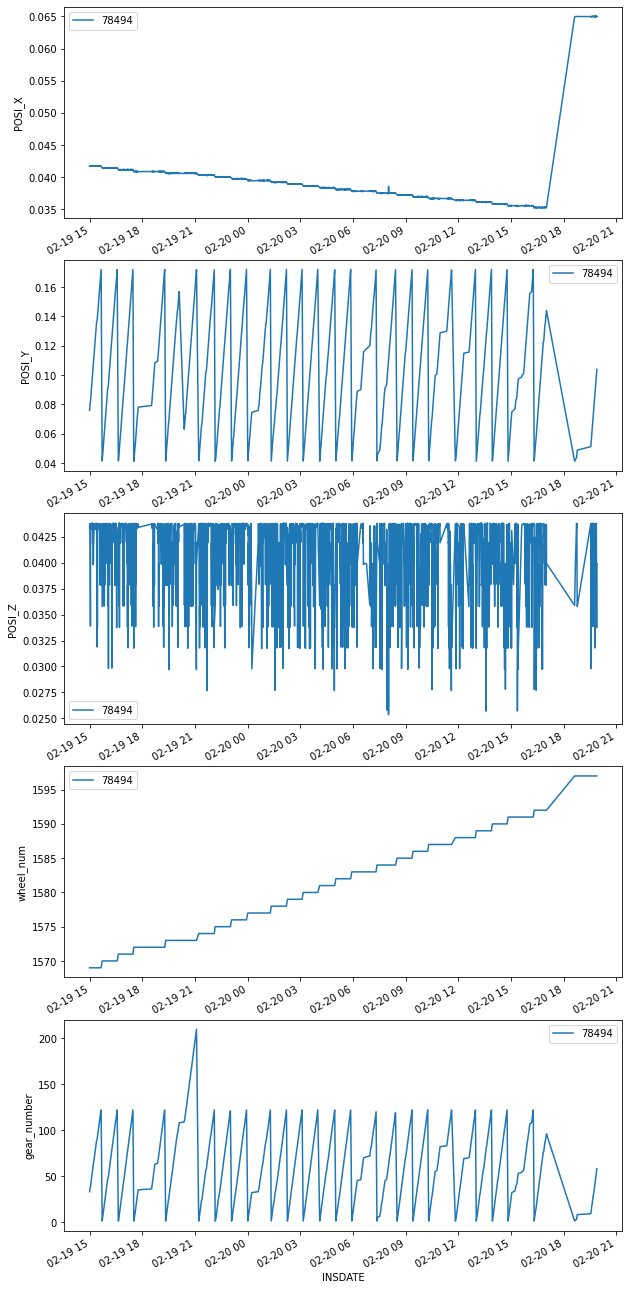

In [74]:
plot_time_series(df_merged, ['POSI_X', 'POSI_Y', 'POSI_Z', 'wheel_num', 'gear_number'], index_is_timestamp=True, groupby=['MA_NR'], ma_nr=[78494], start_date = '2020-02-19 15:00', end_date='2020-02-20 20:00')

In [24]:
df_sc_gn_file = '../data/interim/78494_sharpening_cycle_gear_num_202101201336.csv'

In [25]:
df_sc_gn = pd.read_csv(df_sc_gn_file).set_index('PRIMARY')

In [26]:
df_sc_gn.shape

(248889, 4)

In [27]:
df_sc_gn.head()

,MA_NR,wheel_num,sharpening_cycle,gear_number
PRIMARY,,,,
2346405,78494,2,1,1
2346406,78494,2,1,2
2346407,78494,2,1,3
2346408,78494,2,1,4
2346409,78494,2,1,5


In [30]:
df_m.head()

,PRIMARY,ID,MA_NR,WSG_ID,WZS_ID,WZD_ID,KOR_ID,ST_ID,AT_ID,PUS_ID,...,APM_SCHL_Aktiv,SCHLEIFZEIT,IRMS_V,IMAX_Xanfahrt,IINT_V,VORSTUFE_AKTIV,IMAX_V,IINTOFF_R,NIO,NIO_GROUP
INSDATE,,,,,,,,,,,,,,,,,,,,,
2019-10-21 02:14:36,2346405,8,78494,1,4,1,2,1,1,8,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10101000,1
2019-10-21 02:15:19,2346406,9,78494,1,4,1,2,1,1,8,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10001000,1
2019-10-21 02:15:43,2346407,10,78494,1,4,1,2,1,1,8,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10100000,1
2019-10-21 02:16:07,2346408,11,78494,1,4,1,2,1,1,8,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10100000,1
2019-10-21 02:16:30,2346409,12,78494,1,4,1,2,1,1,8,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10100000,1


In [31]:
df_m.shape

(248890, 61)

In [32]:
df_sc_gn.shape

(248889, 4)

In [69]:
df_merged = df_m.join(df_sc_gn[['wheel_num', 'sharpening_cycle', 'gear_number']], on='PRIMARY')

In [70]:
df_merged = clean_df(df_merged)

dropped 7 columns
dropped 1 rows


In [62]:
df_merged.columns

Index(['PRIMARY', 'ID', 'MA_NR', 'WSG_ID', 'WZS_ID', 'WZD_ID', 'KOR_ID',
       'ST_ID', 'AT_ID', 'PUS_ID', 'IMAX_R', 'IMAX_L', 'IRMS_R', 'IRMS_L',
       'IINT_R', 'IINT_L', 'IMAX_R_abHUB2', 'IRMS_R_abHUB2', 'IINT_R_abHUB2',
       'POSI_X', 'POSI_Y', 'POSI_Y_L', 'POSI_Z', 'ORD1_R', 'ORD2_R',
       'ORDz1_I_R', 'ORDz2_I_R', 'ORDz3_I_R', 'ORDsum_R', 'ORD1_L', 'ORD2_L',
       'ORDz1_I_L', 'ORDz2_I_L', 'ORDz3_I_L', 'ORDsum_L', 'ORDb_aR',
       'ORDz1_aR', 'ORDz2_aR', 'ORDz3_aR', 'ORDsum_aR', 'ORDAmax_aR',
       'ORDFmax_aR', 'ORDb_aL', 'ORDz1_aL', 'ORDz2_aL', 'ORDz3_aL',
       'ORDsum_aL', 'ORDAmax_aL', 'ORDFmax_aL', 'AXIS_C_ACTIVE',
       'FORCE_FAKTOR', 'APM_SCHL_Aktiv', 'NIO', 'NIO_GROUP', 'wheel_num',
       'sharpening_cycle', 'gear_number'],
      dtype='object')

In [23]:
cols = [
    'IMAX_R',
    'IMAX_L',
    'IRMS_R',
    'IRMS_L',
    'IINT_R',
    'IINT_L',
    'IMAX_R_abHUB2',
    'IRMS_R_abHUB2',
    'IINT_R_abHUB2',
    'POSI_X',
    'POSI_Y',
    'POSI_Y_L',
    'POSI_Z',
    'ORD1_R',
    'ORD2_R',
#    'ORDz1_I_R',
#    'ORDz2_I_R',
#    'ORDz3_I_R',
    'ORDsum_R',
    'ORD1_L',
    'ORD2_L',
#    'ORDz1_I_L',
#    'ORDz2_I_L',
#    'ORDz3_I_L',
    'ORDsum_L',
    'ORDb_aR',
    'ORDz1_aR',
#    'ORDz2_aR',
#    'ORDz3_aR',
    'ORDsum_aR',
    'ORDAmax_aR',
    'ORDFmax_aR',
    'ORDb_aL',
    'ORDz1_aL',
#    'ORDz2_aL',
#    'ORDz3_aL',
    'ORDsum_aL',
    'ORDAmax_aL',
    'ORDFmax_aL',
    'AXIS_C_ACTIVE',
    'FORCE_FAKTOR',
    'APM_SCHL_Aktiv',
#    'SCHLEIFZEIT',
#    'IRMS_V',
#    'IMAX_Xanfahrt',
#    'IINT_V',
#    'VORSTUFE_AKTIV',
#    'IMAX_V'
    'gear_number',
    'sharpening_cycle',
    'wheel_num'
    ]

In [63]:
df_merged.groupby(['WSG_ID', 'WZD_ID', 'ST_ID', 'AT_ID']).size()

WSG_ID  WZD_ID  ST_ID  AT_ID
1       1       1      1        248185
3       3       4      3           704
dtype: int64

In [ ]:
# filter for wsg_id = 1, wzd_id = 1, st_id = 1 and at_id = 1 -> very few records for the second set of values

In [64]:
df_cleaned = df_merged.loc[(df_merged['WSG_ID']==1)
                          & (df_merged['WZD_ID']==1)
                          & (df_merged['ST_ID']==1)
                          & (df_merged['AT_ID']==1), :]

In [65]:
df_cleaned.shape

(248185, 57)

In [75]:
df_cleaned['POSI_Y'].agg(['mean', 'min', 'max'])

mean    0.101589
min     0.000000
max     0.171957
Name: POSI_Y, dtype: float64

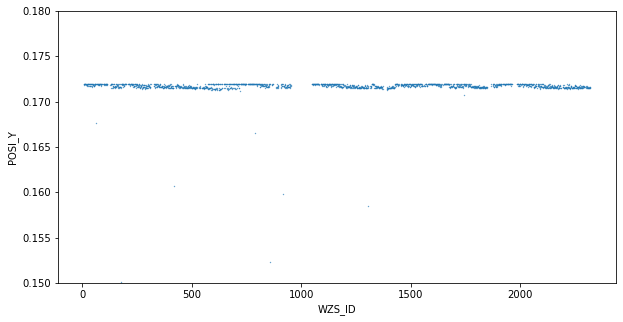

In [96]:
fig, ax = plt.subplots(figsize=(10,5))
df_cleaned.groupby('WZS_ID')['POSI_Y'].max().reset_index().plot(kind = 'scatter', ax=ax, x='WZS_ID', y='POSI_Y', s=0.1)
ax.set_ylim(ymin=0.15, ymax=0.18);

In [94]:
df_cleaned.groupby('WZS_ID')['POSI_Y'].max().reset_index()

,WZS_ID,POSI_Y
0,4,0.059828
1,5,0.050116
2,6,0.171915
3,7,0.171905
4,8,0.171914
...,...,...
2107,2318,0.171552
2108,2319,0.171552
2109,2320,0.171601
2110,2321,0.171603


In [99]:
df.columns

Index(['PRIMARY', 'ID', 'MA_NR', 'WSG_ID', 'WZS_ID', 'WZD_ID', 'KOR_ID',
       'ST_ID', 'AT_ID', 'PUS_ID', 'IMAX_R', 'IMAX_L', 'IRMS_R', 'IRMS_L',
       'IINT_R', 'IINT_L', 'IMAX_R_abHUB2', 'IRMS_R_abHUB2', 'IINT_R_abHUB2',
       'POSI_X', 'POSI_Y', 'POSI_Y_L', 'POSI_Z', 'ORD1_R', 'ORD2_R',
       'ORDz1_I_R', 'ORDz2_I_R', 'ORDz3_I_R', 'ORDsum_R', 'ORD1_L', 'ORD2_L',
       'ORDz1_I_L', 'ORDz2_I_L', 'ORDz3_I_L', 'ORDsum_L', 'ORDb_aR',
       'ORDz1_aR', 'ORDz2_aR', 'ORDz3_aR', 'ORDsum_aR', 'ORDAmax_aR',
       'ORDFmax_aR', 'ORDb_aL', 'ORDz1_aL', 'ORDz2_aL', 'ORDz3_aL',
       'ORDsum_aL', 'ORDAmax_aL', 'ORDFmax_aL', 'AXIS_C_ACTIVE',
       'FORCE_FAKTOR', 'APM_SCHL_Aktiv', 'SCHLEIFZEIT', 'IRMS_V',
       'IMAX_Xanfahrt', 'IINT_V', 'VORSTUFE_AKTIV', 'IMAX_V', 'IINTOFF_R',
       'NIO', 'NIO_GROUP'],
      dtype='object')